#### **Proyecto Monitoreo de Variables para SIMAR**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Función para cargar y acondicionar los datos
def cargar_y_limpiar(url, drop_cols, rename_cols):
    df = pd.read_csv(url)
    df.drop(columns=drop_cols, inplace=True)
    df.rename(columns=rename_cols, inplace=True)
    df['created_at'] = pd.to_datetime(df['created_at'])  
    return df

ch4co8_url = "https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00"
temphum8_url = "https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00"
ch4co8 = cargar_y_limpiar(ch4co8_url, ['entry_id', 'field1', 'field4', 'field5', 'field6'], {'field2': 'Metano', 'field3': 'Monoxido'})
temphum8 = cargar_y_limpiar(temphum8_url, ['entry_id', 'field4', 'field5', 'field6'], {'field1': 'Humedad', 'field2': 'Temperatura', 'field3': 'CO2'})

In [2]:
# Descripción de los datos.
print("La descripción detallada de las variables metano y monóxido es: \n\n", round(ch4co8.describe()))
print('\r \r')
print("La descripción detallada de las variables humedad, temperatura y CO2: \n\n", round(temphum8.describe()))

La descripción detallada de las variables metano y monóxido es: 

        Metano  Monoxido
count  6729.0    6729.0
mean    321.0      13.0
std     220.0       6.0
min       4.0       0.0
25%     143.0      11.0
50%     312.0      14.0
75%     470.0      16.0
max    1344.0      35.0
 
La descripción detallada de las variables humedad, temperatura y CO2: 

        Humedad  Temperatura     CO2
count   6731.0       6731.0  6731.0
mean      50.0         25.0  2077.0
std       21.0         10.0   313.0
min       12.0         11.0   439.0
25%       31.0         16.0  1858.0
50%       54.0         22.0  2178.0
75%       71.0         34.0  2281.0
max       80.0         44.0  2954.0


C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


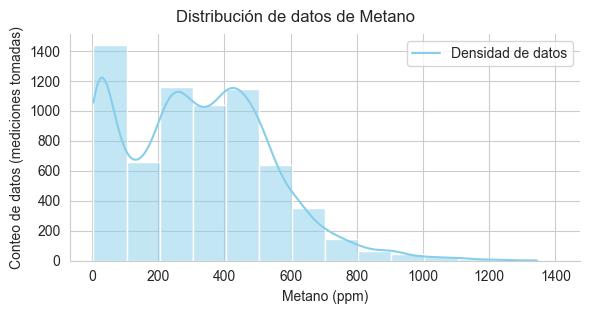

C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


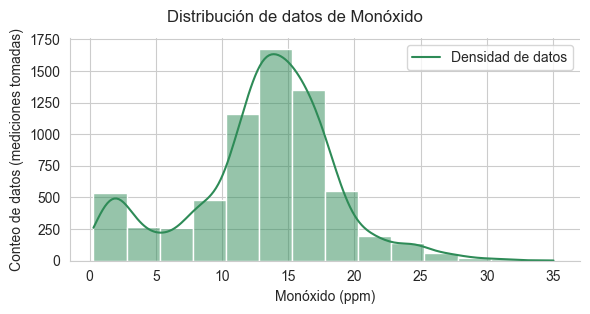

C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


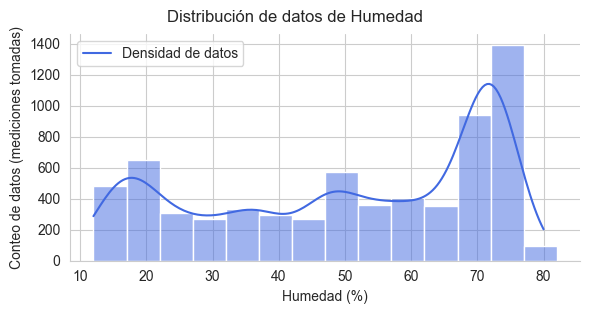

C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


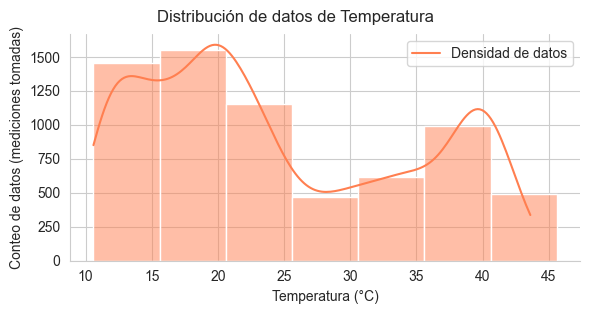

C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


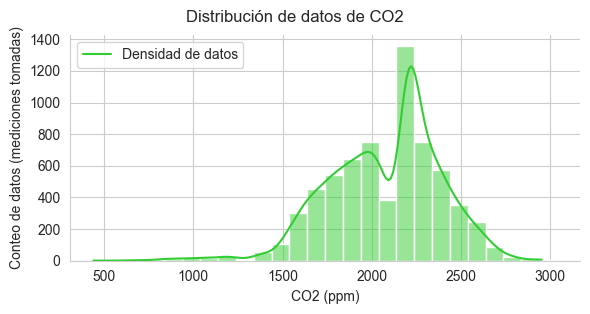

In [3]:
# Gráficas de Distribución de los datos. VERSIÓN 1. 
sns.set_style("whitegrid")

def plot_distribution(data, column, binwidth, color, title, xlabel):
    g = sns.displot(data=data, x=column, binwidth=binwidth, kde=True, color=color, height=3, aspect=2)
    g.set_axis_labels(xlabel, "Conteo de datos (mediciones tomadas)")
    g.figure.suptitle(title, y=1.03)
    plt.legend(['Densidad de datos'])
    plt.show()
    g.savefig(f"{column}_distribucion.png", dpi=300) #En caso de desear guardar las imagenes.

plot_distribution(ch4co8, "Metano", 100, 'skyblue', 'Distribución de datos de Metano', "Metano (ppm)")
plot_distribution(ch4co8, "Monoxido", 2.5, 'seagreen', 'Distribución de datos de Monóxido', "Monóxido (ppm)")
plot_distribution(temphum8, "Humedad", 5, 'royalblue', 'Distribución de datos de Humedad', "Humedad (%)")
plot_distribution(temphum8, "Temperatura", 5, 'coral', 'Distribución de datos de Temperatura', "Temperatura (°C)")
plot_distribution(temphum8, "CO2", 100, 'limegreen', 'Distribución de datos de CO2', "CO2 (ppm)")


C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


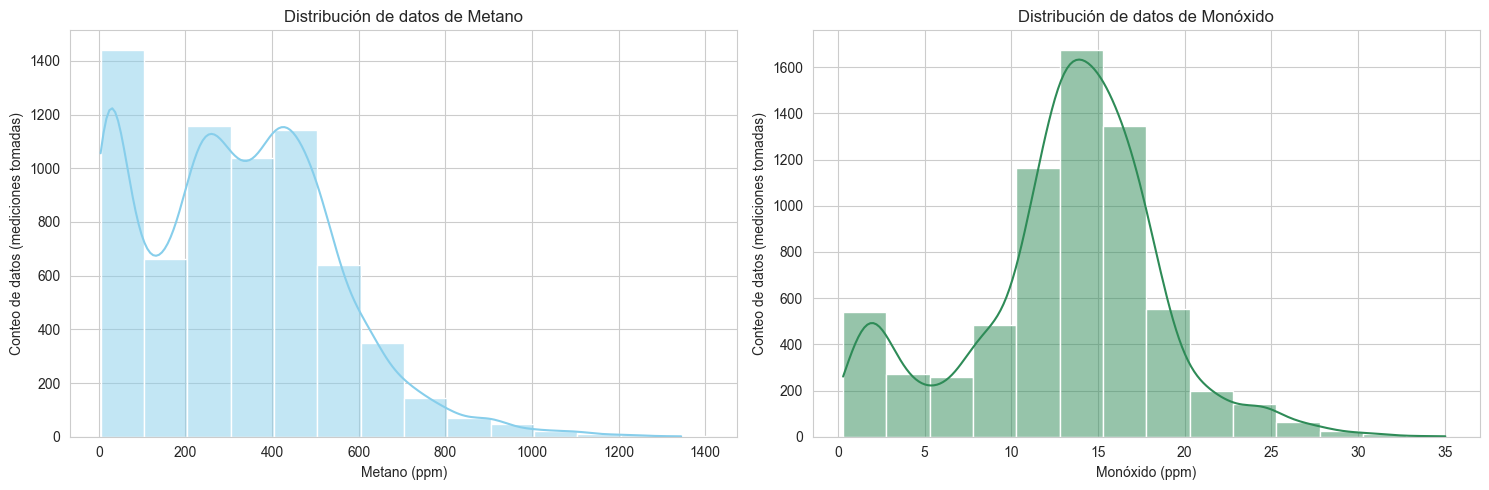

C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\betot\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


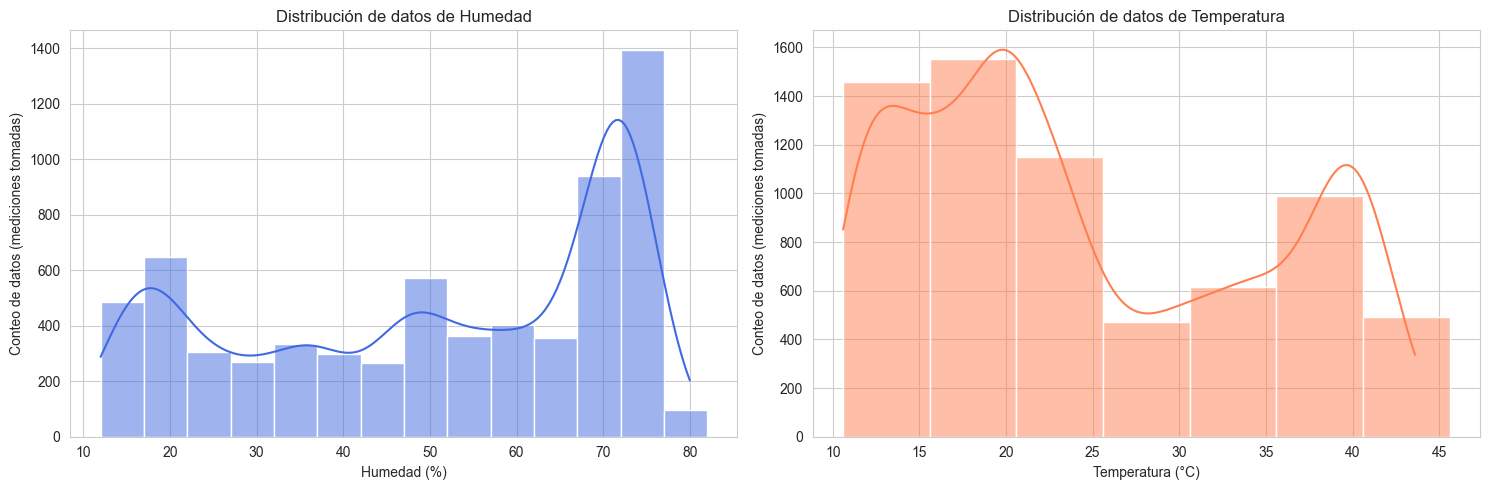

In [4]:
# Gráficas de Distribución de los datos. VERSIÓN 2. 

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=ch4co8, x="Metano", binwidth=100, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de datos de Metano')
axes[0].set_xlabel("Metano (ppm)")
axes[0].set_ylabel("Conteo de datos (mediciones tomadas)")

sns.histplot(data=ch4co8, x="Monoxido", binwidth=2.5, kde=True, color='seagreen', ax=axes[1])
axes[1].set_title('Distribución de datos de Monóxido')
axes[1].set_xlabel("Monóxido (ppm)")
axes[1].set_ylabel("Conteo de datos (mediciones tomadas)")

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=temphum8, x="Humedad", binwidth=5, kde=True, color='royalblue', ax=axes2[0])
axes2[0].set_title('Distribución de datos de Humedad')
axes2[0].set_xlabel("Humedad (%)")
axes2[0].set_ylabel("Conteo de datos (mediciones tomadas)")

sns.histplot(data=temphum8, x="Temperatura", binwidth=5, kde=True, color='coral', ax=axes2[1])
axes2[1].set_title('Distribución de datos de Temperatura')
axes2[1].set_xlabel("Temperatura (°C)")
axes2[1].set_ylabel("Conteo de datos (mediciones tomadas)")

plt.tight_layout()
plt.show()


In [ ]:
# Parte 2
# Adquisición de datos de sensores por periodos de tiempo. 

def setup_sensormm(url):
    df = pd.read_csv(url)
    df.drop(columns=['entry_id', 'field1', 'field4', 'field5', 'field6'], inplace=True)
    df.rename(columns={'field2': 'Metano', 'field3': 'Monóxido'}, inplace=True)
    return df

def setup_sensorth(url):
    df = pd.read_csv(url)
    df.drop(columns=['entry_id', 'field4', 'field5', 'field6'], inplace=True)
    df.rename(columns={'field1': 'Humedad', 'field2': 'Temperatura', 'field3':'CO2'}, inplace=True)
    return df

#Datos Metano y Monóxido
sensormm_8_11_Feb = "https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00"
sensormm_12_15_Feb = "https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-12offset=UTC-06:00&end=2024-02-16offset=UTC-06:00"

#Datos Temperatura, Humedad y CO2
sensorth_8_11_Feb = "https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00"   
sensorth_12_15_Feb = "https://api.thingspeak.com/channels/1935500/feeds.csv?start=2024-02-12offset=UTC-06:00&end=2024-02-16offset=UTC-06:00"

#Acondicionamiento de los datos.
datamm_1 = setup_sensormm(sensormm_8_11_Feb)
datamm_2 = setup_sensormm(sensormm_12_15_Feb)
datath_1 = setup_sensorth(sensorth_8_11_Feb)
datath_2 = setup_sensorth(sensorth_12_15_Feb)

#Unión
data_combined_mm = pd.concat([datamm_1, datamm_2])
data_combined_th = pd.concat([datath_1, datath_2])

In [ ]:
#data_combined_mm.describe()
data_combined_mm.head(10)

In [ ]:
data_combined_th.describe()

In [ ]:
# En caso de que se desee guardar un CSV. 
data_combined_mm.to_csv('data_combined_mm25.csv', index=False)

In [ ]:
# Ajuste de las fechas 
data_combined_mm['created_at'] = pd.to_datetime(data_combined_mm['created_at'])- pd.Timedelta(hours=6)
data_combined_th['created_at'] = pd.to_datetime(data_combined_th['created_at'])- pd.Timedelta(hours=6)
#data_combined_mm['created_at'] = data_combined_mm['created_at'].dt.strftime('%Y-%m-%d %H:%M')
#data_combined_th['created_at'] = data_combined_th['created_at'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
data_combined_mm['created_at'] = data_combined_mm['created_at'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
data_combined_mm
#data_combined_th

In [ ]:
#Verificación de la consistencia de datos.
data_combined_mm = data_combined_mm.sort_values(by='created_at')
data_combined_th = data_combined_th.sort_values(by='created_at')
data_combined_mm = data_combined_mm.drop_duplicates(subset='created_at')
data_combined_th = data_combined_th.drop_duplicates(subset='created_at')

print(data_combined_mm.describe())
print('\r \r')
print(data_combined_th.describe())

In [ ]:
data_combined_mm

In [ ]:
sns.set_theme(style="darkgrid")

data_plot1 = data_combined_mm[["created_at", "Metano"]]
ax = data_plot1.plot(x="created_at", y="Metano", rot=25, color='skyblue')
ax.set_title('Concentración de metano 8 al 16 de febrero', fontsize=15)
ax.set_xlabel('Fecha y Hora', fontsize=14)
ax.set_ylabel('Metano (ppm)', fontsize=14)
ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()


data_plot2 = data_combined_mm[["created_at", "Monóxido"]]
ax = data_plot2.plot(x="created_at", y="Monóxido", rot=25, color='seagreen')
ax.set_title('Concentración de monoxido 8 al 16 de febrero', fontsize=15)
ax.set_xlabel('Fecha y Hora', fontsize=14)
ax.set_ylabel('Monoxido (ppm)', fontsize=14)
ax.tick_params(axis='x', labelsize=9)
plt.tight_layout()
plt.show()

In [ ]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
data_plot1 = data_combined_mm[["created_at", "Metano"]]
#sns.lineplot(data=data_combined_mm, x="created_at", y='Metano')

axes = data_plot1.plot(x="created_at", y="Metano", rot=90, color='skyblue')


#ax.set_title('Concentración de metano 8 al 16 de febrero', fontsize=15)
#ax.set_xlabel('Fecha y Hora', fontsize=14)
#ax.set_ylabel('Metano (ppm)', fontsize=14)
#ax.tick_params(axis='x', labelsize=9)
#plt.tight_layout()
plt.show()


#data_plot2 = data_combined_mm[["created_at", "Monóxido"]]
#ax = data_plot2.plot(x="created_at", y="Monóxido", rot=90, color='seagreen')
#ax.set_title('Concentración de monoxido 8 al 16 de febrero', fontsize=15)
#ax.set_xlabel('Fecha y Hora', fontsize=14)
#ax.set_ylabel('Monoxido (ppm)', fontsize=14)
#ax.tick_params(axis='x', labelsize=9)
#plt.tight_layout()
#plt.show()

In [ ]:
import numpy as np
array=np.array(data_combined_mm["created_at"][::1000])
array

In [ ]:
np.arange(0, 3)

In [ ]:
array.shape

In [ ]:
sns.set_theme(style="darkgrid")
data_plot1 = data_combined_mm[["created_at","Metano"]]
ax = data_plot1.plot(x="created_at", y="Metano", rot=65, color='skyblue')
plt.title('Concentración de metano 8 al 16 de febrero')
plt.xlabel('Fecha y Hora')
plt.ylabel('Metano (ppm)')
plt.show()

In [ ]:
plt.plot(x=data_combined_mm["created_at"],y=data_combined_mm["Metano"])

In [ ]:
#sns.set_theme(style='darkgrid',font_scale=1.3)

plt.figure(figsize=(12, 7))
sns.lineplot(data=data_combined_mm, x='created_at', y='Metano')
#plt.legend(loc='best')
#plt.xticks(xnew[::120],['0','2:00','4:00','6:00','8:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00','24:00'], rotation = 0)
#plt.ylabel("Glucose Level (mg/dL)", fontsize=14)
#plt.xlabel("Time (hours)", fontsize=14)
#plt.title('7-days Glucose Behavior')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tema darkgrid
sns.set_theme(style="darkgrid")

# Crear la gráfica de línea
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
plt.plot(data_combined_mm['created_at'], data_combined_mm['Metano'], label='Metano')

# Añadir título y etiquetas
plt.title('Serie Temporal de Metano')
plt.xlabel('Fecha')
plt.ylabel('Metano')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Función para graficar series de tiempo
def graficar_serie_tiempo(df, x, y, title, xlabel, ylabel, color='blue'):
    ax = df.plot(x=x, y=y, rot=90, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.grid()
    plt.show()

# Gráficos de series de tiempo
graficar_serie_tiempo(ch4co8, 'created_at', 'Metano', 'Concentración de metano 8 al 11 de febrero', 'Hora', 'PPM', 'green')
graficar_serie_tiempo(ch4co8, 'created_at', 'Monoxido', 'Concentración de monóxido 8 al 11 de febrero', 'Hora', 'PPM', 'orange')
graficar_serie_tiempo(temphum8, 'created_at', 'Humedad', 'Nivel de humedad 8 al 11 de febrero', 'Hora', '%')
graficar_serie_tiempo(temphum8, 'created_at', 'Temperatura', 'Nivel de temperatura 8 al 11 de febrero', 'Hora', '°C')
graficar_serie_tiempo(temphum8, 'created_at', 'CO2', 'Concentración de CO2 8 al 11 de febrero', 'Hora', 'PPM', 'red')

In [ ]:
ch4co_part1 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-08offset=UTC-06:00&end=2024-02-12offset=UTC-06:00")
ch4co_part2 = pd.read_csv("https://api.thingspeak.com/channels/2378137/feeds.csv?start=2024-02-12offset=UTC-06:00&end=2024-02-16offset=UTC-06:00")

ch4co_part1.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co_part1.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)

ch4co_part2.drop(columns=['entry_id','field1','field4', 'field5', 'field6'],inplace=True)
ch4co_part2.rename(columns={'field2':'Metano', 'field3': 'Monoxido'}, inplace=True)


In [ ]:
ch4co_part2.describe()